# OkCupid Date-A-Scientist
## Codecademy Data Scientist Path
## 18.1.1 OkCupid-Date-A-Scientist Portfolio Project

## Introduction

The goal of this project is to analyze data from the online dating platform OKCupid.  In recent years, there has been a massive rise in the usage of dating apps to find and create romantic connections.  Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience.  These apps give us access to a wealth of information that we've never had before about how different people experience love.

This project scopes, prepares, analyzes, and creates a machine learning model to solve a question.

**Data sources:**

`profiles.csv` was provided by [Codecademy.com](https://www.codecademy.com).

## Scoping

It is beneficial to create a project scope whenever a new project is being started.  The scoping process for this project is based on the University of Chicago's [Data Science Project Scoping Guide](http://www.datasciencepublicpolicy.org/home/resources/data-science-project-scoping-guide/).  In accordance with this guide, the four sections below help guide the project's process and progress.  In the first section, we define the project's goals, including the high-level objectives and intentions for this project.  The next section is the data.  Fortunately, for this project, the relevant data is already provided; however, it still must be checked whether project goals can be met with the available data. We must also provide a thorough analysis of the methods and questions that are aligned with the project goals.  Finally, an evaluation of our project helps us draw conclusions and state findings from our analysis.

### Project Goals

In this project, we seek to utilize the skills learned through Codecademy and apply machine learning techniques to a dataset.  Below is the primary research question to be answered:
- Can an OkCupid user's astrological sign be predicted using other variables from their profiles?

This project is important since many users find astrological signs an important part of matches, and if users don't input their sign, OkCupid would like to predict which sign they might be. 

### Data

The project has one data set provided by Codecademy called `profiles.csv`.  In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions. 

### Analysis

This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables.  Since the goal of the project to make predictions on the user's astrological signs, classification algorithms from the supervised learning family of machine learning models will be implemented. 

### Evaluation

Lastly, it is a good idea to revisit the original goals and check whether the output of the analysis corresponds to the question first set forth (in the goals section).  This section also reflects on what was learned through the process and whether the question was unable to be answered.  The section could also include limitations to analysis or whether any of the analysis could have been done using different methodologies.  Finally, the project will conclude with the evaluation of the machine learning model selected with a validation data set.  The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and Kappa scores.

## Import Python Modules

First, import the primary modules necessary for this project.

In [1]:
# General libraries
import numpy as np
import pandas as pd
import re

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load the Data

To analyze the user profiles from OkCupid, we can use Pandas to load the dataset into a `DataFrame` that can be explored and visualized with Python.

Below, `profiles.csv` is read into a `DataFrame` called `profiles`.

`profiles.csv` - contains several columns of multiple choice data:
- **body_type** - _categorical variable of body type of user_
- **diet** - _categorical variable of dietary information_
- **drinks** - _categorical variable of alcohol consumption_
- **drugs** - _categorical variable of drug usage_
- **education** - _categorical variable of educational attainment_
- **ethnicity** - _categorical variable of ethnic backgrounds_
- **height** - _continuous variable of height of user_
- **income** - _continuous variable of income of user_
- **job** - _categorical variable of employment description_
- **offspring** - _categorical variable of children status_
- **orientation** - _categorical variable of sexual orientation_
- **pets** - _categorical variable of pet preferences_
- **religion** - _categorical variable of religious background_
- **sex** - _categorical variable of gender_
- **sign** - _categorical variable of astrological symbol_
- **smokes** - _categorical variable of smoking consumption_
- **speaks** - _categorical variable of language spoken_
- **status** - _categorical variable of relationship status_

As well as a set of open-ended, short-answer responses to:
- **essay0** - _My self-summary_
- **essay1** - _What I’m doing with my life_
- **essay2** - _I’m really good at…_
- **essay3** - _The first thing people usually notice about me…_
- **essay4** - _Favorite books, movies, show, music, and food_
- **essay5** - _The six things I could never do without_
- **essay6** - _I spend a lot of time thinking about…_
- **essay7** - _On a typical Friday night I am…_
- **essay8** - _The most private thing I am willing to admit_
- **essay9** - _You should message me if…_

Other open-ended data include:
- **age** - _continuous variable of age of user_
- **location** - _categorical variable of user locations_

And the data also gives user login information:
- **last_online** - _date variable of last login_

Then, we can inspect the `DataFrame` using `.head()` to check the contents.

In [2]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')

profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
profiles.shape

(59946, 31)

#### Data Characteristics

There are 59,946 rows and 31 columns in `profiles`.  Since the dataset contains so much data, it will work well for machine learning.

In [4]:
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

In [5]:
mult_choice_cols = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity', 'height', 'income', 'job', 'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status']
essay_cols = ['essay' + str(i) for i in range(10)]

other_cols = []
for col in profiles.columns.tolist():
    if (col not in mult_choice_cols) and (col not in essay_cols):
        other_cols.append(col)

## Explore the Data

First, it is necessary to explore the `sign` column and confirm that it contains only 12 unique astrological signs.

In [6]:
print('Number of unique signs: ' + str(profiles.sign.nunique()))

profiles.sign.unique()

Number of unique signs: 48


array(['gemini', 'cancer', 'pisces but it doesn&rsquo;t matter', 'pisces',
       'aquarius', 'taurus', 'virgo', 'sagittarius',
       'gemini but it doesn&rsquo;t matter',
       'cancer but it doesn&rsquo;t matter',
       'leo but it doesn&rsquo;t matter', nan,
       'aquarius but it doesn&rsquo;t matter',
       'aries and it&rsquo;s fun to think about',
       'libra but it doesn&rsquo;t matter',
       'pisces and it&rsquo;s fun to think about', 'libra',
       'taurus but it doesn&rsquo;t matter',
       'sagittarius but it doesn&rsquo;t matter',
       'scorpio and it matters a lot',
       'gemini and it&rsquo;s fun to think about',
       'leo and it&rsquo;s fun to think about',
       'cancer and it&rsquo;s fun to think about',
       'libra and it&rsquo;s fun to think about',
       'aquarius and it&rsquo;s fun to think about',
       'virgo but it doesn&rsquo;t matter',
       'scorpio and it&rsquo;s fun to think about',
       'capricorn but it doesn&rsquo;t matter', 'sc

#### Clean labels

Upon closer examination, it appears the `sign` column contains both the user's self-reported astrological sign as well as how strongly they feel about it.

The other multiple choice columns may also need to be cleaned.

In [7]:
for column in mult_choice_cols:
    print('\nUnique {}:\n{}'.format(column, profiles[column].unique()))


Unique body_type:
['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']

Unique diet:
['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']

Unique drinks:
['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']

Unique drugs:
['never' 'sometimes' nan 'often']

Unique education:
['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year college' nan 'graduated from high school'
 'working on masters program' 'graduated from space camp'
 'college/university' 'dropped out of space camp'
 'graduated from ph.d program' 'graduated from law school'
 'working on ph.d program' 'two-yea


Unique height:
[75. 70. 68. 71. 66. 67. 65. 72. 62. 64. 69. 73. 74. 60. 63. 76. 61. 78.
 79. 59. 80. 91. 83. 77. 58. 56. 95. 57. 87. 81. 36. 43. 52. 55. 53. 93.
  8. 54. 82.  3. 86. 42. 84. 94. 50.  6. 47. 49. 48. 90. 88. nan 37.  9.
 51.  1. 92. 26. 85. 89.  4.]

Unique income:
[     -1   80000   20000   40000   30000   50000   60000 1000000  150000
  100000  500000   70000  250000]

Unique job:
['transportation' 'hospitality / travel' nan 'student'
 'artistic / musical / writer' 'computer / hardware / software'
 'banking / financial / real estate' 'entertainment / media'
 'sales / marketing / biz dev' 'other' 'medicine / health'
 'science / tech / engineering' 'executive / management'
 'education / academia' 'clerical / administrative'
 'construction / craftsmanship' 'rather not say' 'political / government'
 'law / legal services' 'unemployed' 'military' 'retired']

Unique offspring:
['doesn&rsquo;t have kids, but might want them' nan
 'doesn&rsquo;t want kids' 'doesn&rsquo;t have 

The following columns should be cleaned:
- `diet` - split into diet preference and diet importance
- `education` - split into education level and education progress
- `ethnicity` - expanded into columns containing each identified ethnicity
- `offspring` - split into offspring status and offspring desire
- `pets` - split into dogs preference and cats preference
- `religion` - split into religion preference and religion importance
- `speaks` - expanded into columns containing each identified language and language fluency

In [8]:
profiles['diet_cleaned'] = profiles.diet.str.split().str.get(-1)
profiles['diet_importance'] = profiles.diet.str.split().str.get(-2)

profiles['education_cleaned'] = profiles.education.str.split(' on | from | of ').str.get(-1)
profiles['education_progress'] = profiles.education.str.split(' on | from | of ').str.get(-2)

profiles[['ethnicity' + str(i) for i in range(9)]] = profiles.ethnicity.str.split(', ', expand=True)

profiles['offspring_cleaned'] = profiles.offspring.str.replace('&rsquo;', "'").str.split(', but |, and ').str.join(', ').str.findall("\w*'?t? ?ha\w+ \w+? ?\w+").str.join(' ').str.strip()
profiles['offspring_desire'] = profiles.offspring.str.replace('&rsquo;', "'").str.split(', but |, and ').str.join(', ').str.findall("\w*'?t? ?wants?").str.join(' ').str.strip()

profiles['dogs_preference'] = profiles.pets.str.findall('\w+ dogs').str.join(' ')
profiles['cats_preference'] = profiles.pets.str.findall('\w+ cats').str.join(' ')

profiles['religion_cleaned'] = profiles.religion.str.split().str.get(0)
profiles['religion_importance'] = profiles.religion.str.split().str[2:].str.join(' ').str.replace('&rsquo;', "'")

profiles['sign_cleaned'] = profiles.sign.str.split().str.get(0)
profiles['sign_importance'] = profiles.sign.str.split().str[2:].str.join(' ').str.replace('&rsquo;', "'")

df1 = profiles.speaks.str.split(', ', expand=True)
df1.columns = ['speaks' + str(i) for i in range(5)]

for i in range(5):
    profiles['language' + str(i)] = df1['speaks' + str(i)].str.findall('.+(?= \()').str.join('')
    profiles['fluency' + str(i)] = df1['speaks' + str(i)].str.findall('(?=\().+(?<=\))').str.join('').str.strip('(').str.strip(')')

profiles['city'] = profiles.location.str.split(', ').str.get(0)
profiles['state_country'] = profiles.location.str.split(', ').str.slice(1, 3).str.join(', ')

profiles = profiles.drop(['diet', 'education', 'ethnicity', 'offspring', 'pets', 'religion', 'sign', 'speaks', 'location'], axis=1)

profiles = profiles.replace('', np.nan)

profiles.head()

,age,body_type,drinks,drugs,essay0,essay1,essay2,essay3,essay4,essay5,...,language1,fluency1,language2,fluency2,language3,fluency3,language4,fluency4,city,state_country
0,22,a little extra,socially,never,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,...,None,None,None,None,None,None,None,None,south san francisco,california
1,35,average,often,sometimes,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,...,spanish,poorly,french,poorly,None,None,None,None,oakland,california
2,38,thin,socially,NaN,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,...,NaN,NaN,NaN,NaN,None,None,None,None,san francisco,california
3,23,thin,socially,NaN,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,...,german,poorly,None,None,None,None,None,None,berkeley,california
4,29,athletic,socially,never,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,...,None,None,None,None,None,None,None,None,san francisco,california


In [9]:
print('Unique diet: ' + str(profiles.diet_cleaned.unique()))
print(profiles.diet_cleaned.value_counts())

print('\nUnique diet_importance: ' + str(profiles.diet_importance.unique()))
print(profiles.diet_importance.value_counts())

Unique diet: ['anything' 'other' 'vegetarian' nan 'vegan' 'halal' 'kosher']
anything      27881
vegetarian     4986
other          1790
vegan           702
kosher          115
halal            77
Name: diet_cleaned, dtype: int64

Unique diet_importance: ['strictly' 'mostly' nan]
mostly      21508
strictly     6704
Name: diet_importance, dtype: int64


In [10]:
print('Unique education: ' + str(profiles.education_cleaned.unique()))
print(profiles.education_cleaned.value_counts())

print('\nUnique education_progress: ' + str(profiles.education_progress.unique()))
print(profiles.education_progress.value_counts())

Unique education: ['college/university' 'space camp' 'masters program' 'two-year college'
 nan 'high school' 'ph.d program' 'law school' 'med school']
college/university    31467
masters program       10920
two-year college       3018
ph.d program           2408
high school            1713
space camp             1683
law school             1428
med school              681
Name: education_cleaned, dtype: int64

Unique education_progress: ['working' 'graduated' nan 'dropped out']
graduated      39376
working        10465
dropped out     2108
Name: education_progress, dtype: int64


In [11]:
for i in range(9):
    print('\nUnique ethnicity' + str(i) + ': ' + str(profiles['ethnicity' + str(i)].unique()))
    print(profiles['ethnicity' + str(i)].value_counts())


Unique ethnicity0: ['asian' 'white' nan 'hispanic / latin' 'pacific islander' 'black'
 'middle eastern' 'native american' 'indian' 'other']
white               33472
asian                8205
hispanic / latin     4379
black                3071
other                1706
indian               1196
middle eastern        811
pacific islander      717
native american       709
Name: ethnicity0, dtype: int64

Unique ethnicity1: ['white' None nan 'black' 'other' 'native american' 'pacific islander'
 'middle eastern' 'hispanic / latin' 'indian']
white               3611
other               1090
hispanic / latin     697
pacific islander     599
native american      422
black                166
middle eastern       139
indian               135
Name: ethnicity1, dtype: int64

Unique ethnicity2: [None nan 'other' 'white' 'hispanic / latin' 'pacific islander' 'black'
 'native american' 'indian']
white               568
other               506
hispanic / latin    156
black                91
native a

In [12]:
print('Unique offpring: ' + str(profiles.offspring_cleaned.unique()))
print(profiles.offspring_cleaned.value_counts())

print('\nUnique offspring_desire: ' + str(profiles.offspring_desire.unique()))
print(profiles.offspring_desire.value_counts())

Unique offpring: ["doesn't have kids" nan 'has a kid' 'has kids']
doesn't have kids    16132
has kids              2461
has a kid             2458
Name: offspring_cleaned, dtype: int64

Unique offspring_desire: ['might want' nan "doesn't want" 'wants']
doesn't want    4776
might want      4403
wants           3882
Name: offspring_desire, dtype: int64


In [13]:
print('Unique dogs_preference: ' + str(profiles.dogs_preference.unique()))
print(profiles.dogs_preference.value_counts())

print('\nUnique cats_preference: ' + str(profiles.cats_preference.unique()))
print(profiles.cats_preference.value_counts())

Unique dogs_preference: ['likes dogs' nan 'has dogs' 'dislikes dogs']
likes dogs       28380
has dogs          8493
dislikes dogs      561
Name: dogs_preference, dtype: int64

Unique cats_preference: ['likes cats' 'has cats' nan 'dislikes cats']
likes cats       18450
has cats          7274
dislikes cats     2899
Name: cats_preference, dtype: int64


In [14]:
print('Unique religion: ' + str(profiles.religion_cleaned.unique()))
print(profiles.religion_cleaned.value_counts())

print('\nUnique religion_importance: ' + str(profiles.religion_importance.unique()))
print(profiles.religion_importance.value_counts())

Unique religion: ['agnosticism' nan 'atheism' 'christianity' 'other' 'catholicism'
 'buddhism' 'judaism' 'hinduism' 'islam']
agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: religion_cleaned, dtype: int64

Unique religion_importance: ['very serious about it' 'not too serious about it' nan
 'laughing about it' 'somewhat serious about it']
not too serious about it     12212
laughing about it             8995
somewhat serious about it     4516
very serious about it         2216
Name: religion_importance, dtype: int64


In [15]:
print('Unique sign: ' + str(profiles.sign_cleaned.unique()))
print(profiles.sign_cleaned.value_counts())

print('\nUnique sign_importance: ' + str(profiles.sign_importance.unique()))
print(profiles.sign_importance.value_counts())

Unique sign: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: sign_cleaned, dtype: int64

Unique sign_importance: [nan "it doesn't matter" "it's fun to think about" 'it matters a lot']
it's fun to think about    19333
it doesn't matter          16758
it matters a lot             675
Name: sign_importance, dtype: int64


In [16]:
for i in range(5):
    print('\nUnique language' + str(i) + ': ' + str(profiles['language' + str(i)].unique()))
    #print(profiles['speaks' + str(i)].value_counts())
    print('\nUnique fluency' + str(i) + ': ' + str(profiles['fluency' + str(i)].unique()))
    #print(profiles['fluency' + str(i)].value_counts())


Unique language0: [nan 'english' 'french' 'portuguese']

Unique fluency0: [nan 'fluently' 'okay' 'poorly']

Unique language1: [None 'spanish' nan 'german' 'chinese' 'sign language' 'c++' 'tagalog'
 'other' 'dutch' 'indonesian' 'french' 'swedish' 'japanese' 'farsi'
 'italian' 'hindi' 'afrikaans' 'russian' 'polish' 'english' 'korean'
 'croatian' 'vietnamese' 'esperanto' 'portuguese' 'latin' 'czech' 'greek'
 'norwegian' 'hebrew' 'swahili' 'arabic' 'thai' 'turkish' 'tamil'
 'serbian' 'sanskrit' 'bengali' 'lisp' 'catalan' 'hungarian' 'urdu'
 'romanian' 'finnish' 'ancient greek' 'yiddish' 'irish' 'cebuano'
 'persian' 'danish' 'gujarati' 'khmer' 'bulgarian' 'hawaiian' 'albanian'
 'frisian' 'ilongo' 'icelandic' 'slovenian' 'belarusan' 'latvian'
 'occitan' 'malay' 'mongolian' 'slovak' 'georgian' 'armenian' 'estonian'
 'chechen' 'lithuanian' 'rotuman' 'welsh' 'maori' 'basque' 'ukrainian'
 'tibetan' 'breton']

Unique fluency1: [None 'poorly' nan 'okay' 'fluently']

Unique language2: [None 'frenc

In [17]:
print('Unique city: ' + str(profiles.city.unique()))
print(profiles.city.value_counts())

print('\nUnique state_country: ' + str(profiles.state_country.unique()))
print(profiles.state_country.value_counts())

Unique city: ['south san francisco' 'oakland' 'san francisco' 'berkeley'
 'belvedere tiburon' 'san mateo' 'daly city' 'san leandro' 'atherton'
 'san rafael' 'walnut creek' 'menlo park' 'belmont' 'san jose' 'palo alto'
 'emeryville' 'el granada' 'castro valley' 'fairfax' 'mountain view'
 'burlingame' 'martinez' 'pleasant hill' 'hayward' 'alameda' 'vallejo'
 'benicia' 'el cerrito' 'mill valley' 'richmond' 'redwood city'
 'el sobrante' 'stanford' 'san pablo' 'novato' 'pacifica' 'lafayette'
 'half moon bay' 'fremont' 'orinda' 'san anselmo' 'corte madera' 'albany'
 'san carlos' 'san lorenzo' 'foster city' 'hercules' 'santa cruz'
 'bolinas' 'sausalito' 'millbrae' 'larkspur' 'moraga' 'san bruno'
 'petaluma' 'pinole' 'san geronimo' 'crockett' 'boulder' 'brisbane'
 'freedom' 'montara' 'green brae' 'woodside' 'new york' 'ross'
 'east palo alto' 'san quentin' 'portland' 'rodeo' 'hacienda heights'
 'woodacre' 'westlake' 'riverside' 'rohnert park' 'sacramento'
 'point richmond' 'san diego' 'canyon 

In [18]:
profiles.age.mean(), profiles.age.median(), profiles.age.min(), profiles.age.max(), profiles.age.std()

(32.3402895939679, 30.0, 18, 110, 9.452779096971224)

In [19]:
profiles.last_online.min(), profiles.last_online.max()

('2011-06-27-01-52', '2012-07-01-08-57')

## Continuous Variables

#### Age

The following plot shows the distribution of users' ages.  Most users seem to be in their 20s and 30s.

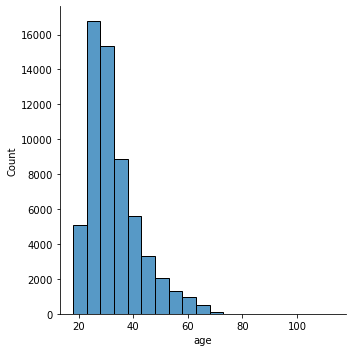

In [20]:
sns.displot(data=profiles, x='age', kind='hist', binwidth=5)
plt.show()

The below plots break down the age distribution by gender.  While there are more males than females, the distributions for each gender have roughly the same shape.

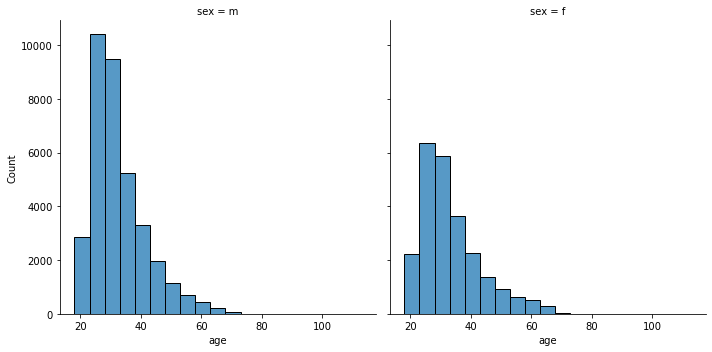

In [21]:
sns.displot(data=profiles, x='age', col='sex', kind='hist', binwidth=5)
plt.show()

#### Height

This next plot shows the distribution of users' heights in inches.  Nearly all users report a height between 5'0" and 6'6".

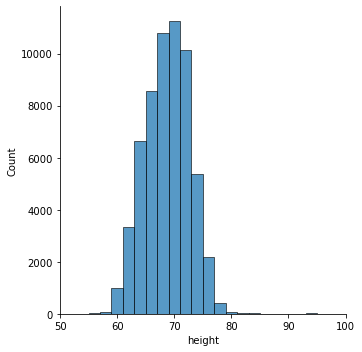

In [22]:
sns.displot(data=profiles, x='height', kind='hist', binwidth=2)
plt.xlim(50, 100)
plt.show()

Again, the height distribution is broken down into genders.  Male heights are mostly between 5'4" and 6'6", while females are mostly between 5'0" and 6'0".  Both genders are roughly normally distributed in terms of height.

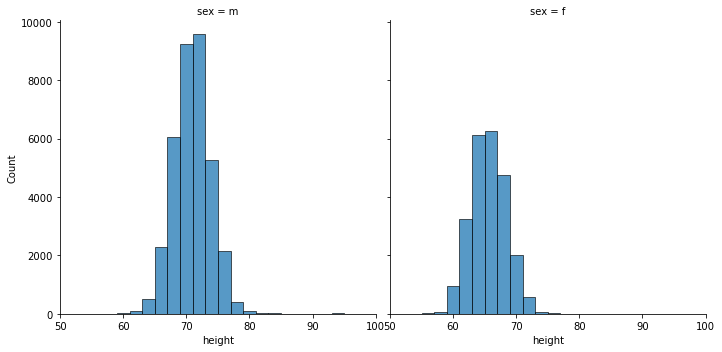

In [23]:
sns.displot(data=profiles, x='height', col='sex', kind='hist', binwidth=2)
plt.xlim(50, 100)
plt.show()

#### Income

The next graph is the distribution of self-reported yearly income with genders stacked.  Most users do not report their income levels.

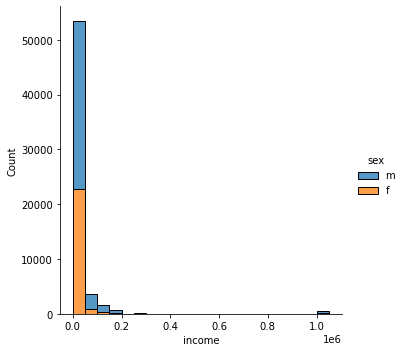

In [24]:
sns.displot(data=profiles, x='income', hue='sex', kind='hist', binwidth=50000, multiple='stack')
plt.show()

## Discrete Variables

#### Sex

Before, it was established that there were more male users than female.  The below chart shows there are roughly 35,000 males and just under 25,000 females.

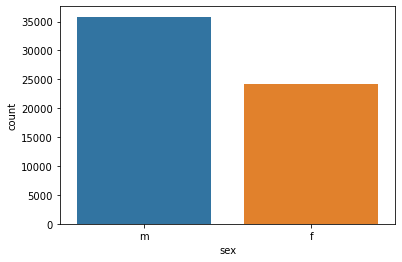

In [25]:
sns.countplot(data=profiles, x='sex')
plt.show()

#### Body Type

The following chart shows the `body_type` variable.  Most users describe themselves as average, fit, or athletic.

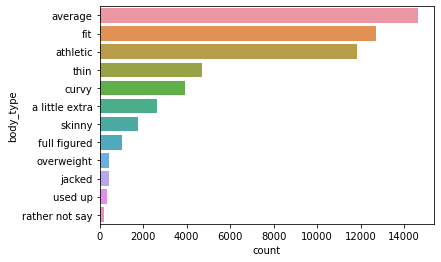

In [26]:
sns.countplot(data=profiles, y='body_type', order=profiles.body_type.value_counts().index)
plt.show()

The next chart breaks down the body type descriptions by gender.  It seems many of these are quite gendered.  For example, descriptions such as "curvy" and "full figured" tend to be more feminine, while "a little extra" and "overweight" tend to be more masculine.

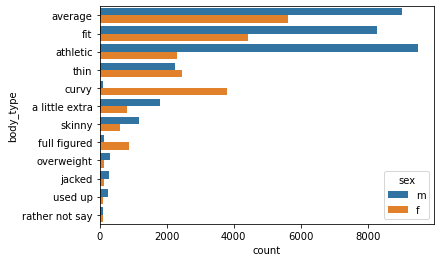

In [27]:
sns.countplot(data=profiles, y='body_type', hue='sex', order=profiles.body_type.value_counts().index)
plt.show()

#### Diet

The below two graphs show that most people have no preference with respect to the food they eat.  Those with a preference tend to be more open-minded, reporting "mostly" as opposed to "strictly".

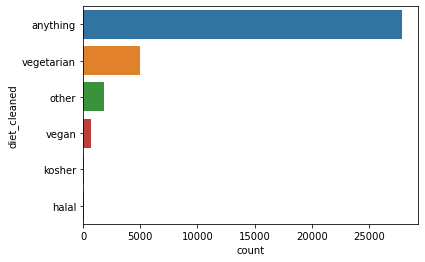

In [28]:
sns.countplot(data=profiles, y='diet_cleaned', order=profiles.diet_cleaned.value_counts().index)
plt.show()

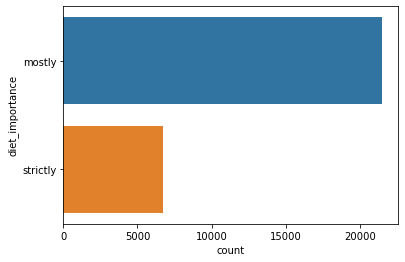

In [29]:
sns.countplot(data=profiles, y='diet_importance', order=profiles.diet_importance.value_counts().index)
plt.show()

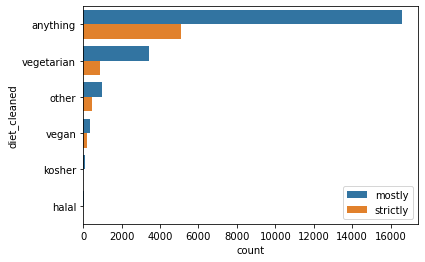

In [30]:
sns.countplot(data=profiles, y='diet_cleaned', hue='diet_importance',\
              order=profiles.diet_cleaned.value_counts().index,\
              hue_order=profiles.diet_importance.value_counts().index)
plt.legend(loc=4)
plt.show()

#### Drinks

Most folks consider themselves social, occasional, or frequent drinkers.

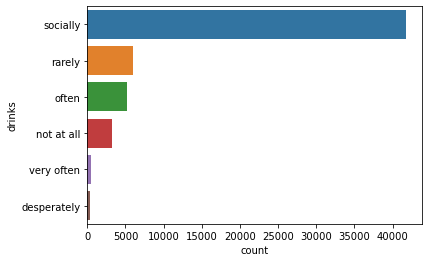

In [31]:
sns.countplot(data=profiles, y='drinks', order=profiles.drinks.value_counts().index)
plt.show()

#### Drugs

The vast majority of people never use drugs.

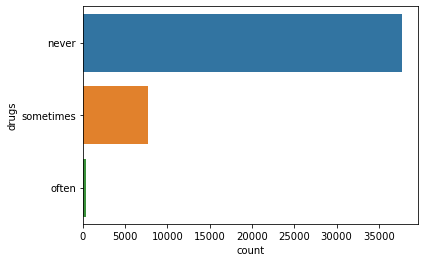

In [32]:
sns.countplot(data=profiles, y='drugs')
plt.show()

#### Education

Most users report having graduated from college/university or a master's program.  Among non-graduates, most are currently working toward a degree.

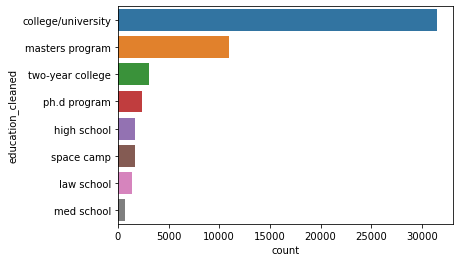

In [33]:
sns.countplot(data=profiles, y='education_cleaned', order=profiles.education_cleaned.value_counts().index)
plt.show()

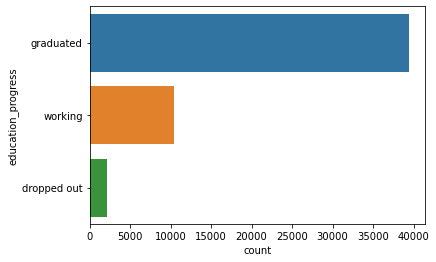

In [34]:
sns.countplot(data=profiles, y='education_progress', order=profiles.education_progress.value_counts().index)
plt.show()

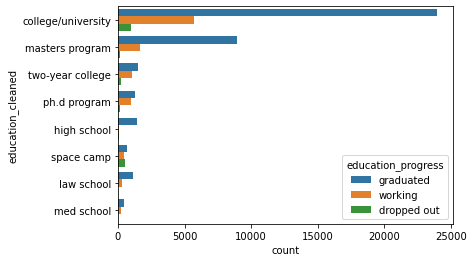

In [35]:
sns.countplot(data=profiles, y='education_cleaned', hue='education_progress',\
              order=profiles.education_cleaned.value_counts().index,\
              hue_order=profiles.education_progress.value_counts().index)
plt.show()

#### Jobs

Most users don't fit into one of the given categories.  However, there is a fair share of students, artists, and businesspeople.

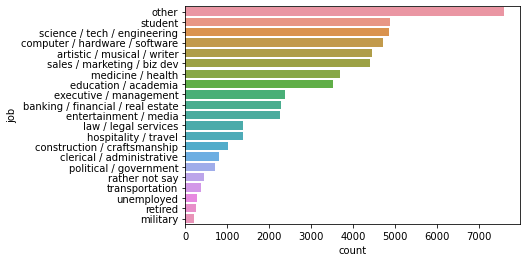

In [36]:
sns.countplot(data=profiles, y='job', order=profiles.job.value_counts().index)
plt.show()

#### Offspring

Most users don't have any children, but the number of users with one child is about the same as the number with more than one child.  Users who already have children tend to not want any more, while those without children tend to want to have some.

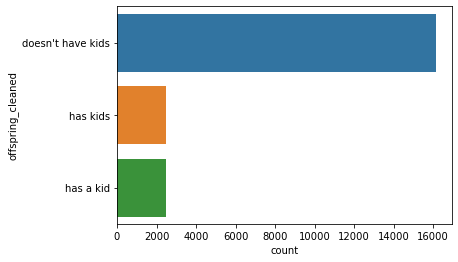

In [37]:
sns.countplot(data=profiles, y='offspring_cleaned', order=profiles.offspring_cleaned.value_counts().index)
plt.show()

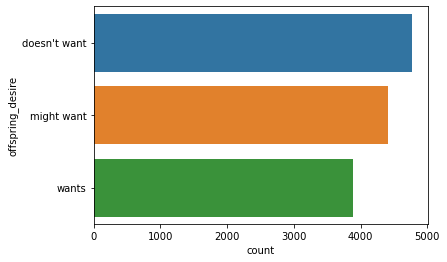

In [38]:
sns.countplot(data=profiles, y='offspring_desire', order=profiles.offspring_desire.value_counts().index)
plt.show()

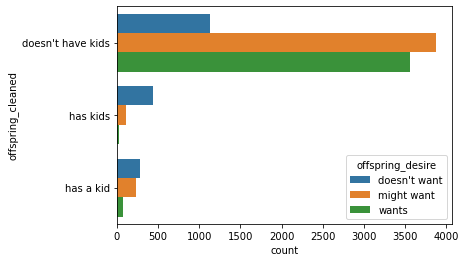

In [39]:
sns.countplot(data=profiles, y='offspring_cleaned', hue='offspring_desire',\
              order=profiles.offspring_cleaned.value_counts().index,\
              hue_order=profiles.offspring_desire.value_counts().index)
plt.show()

#### Orientation

The majority of folks are straight, but interestingly, female users disproportionately identify as bisexual more than males.

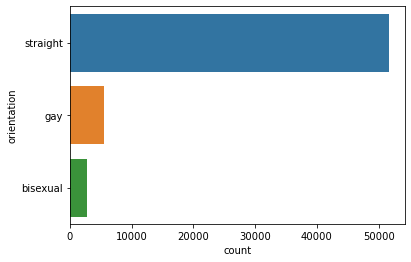

In [40]:
sns.countplot(data=profiles, y='orientation', order=profiles.orientation.value_counts().index)
plt.show()

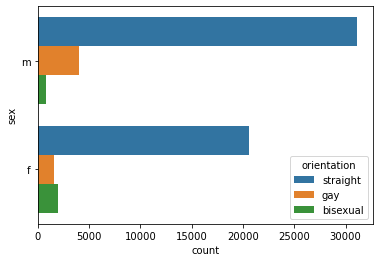

In [41]:
sns.countplot(data=profiles, y='sex', hue='orientation', hue_order=profiles.orientation.value_counts().index)
plt.show()

#### Pets

It seems more users prefer dogs to cats, though dog ownership is only slighltly higher than cat ownership.  In general, those owning or liking cats also like dogs more frequently than those owning or liking dogs do cats.

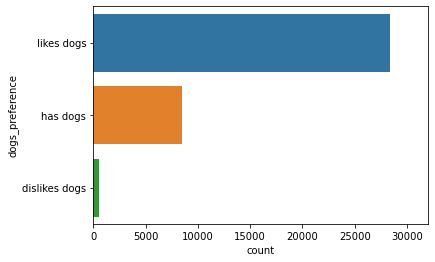

In [42]:
sns.countplot(data=profiles, y='dogs_preference')
plt.xlim(0, 32000)
plt.show()

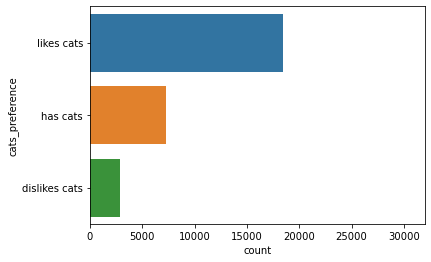

In [43]:
sns.countplot(data=profiles, y='cats_preference')
plt.xlim(0, 32000)
plt.show()

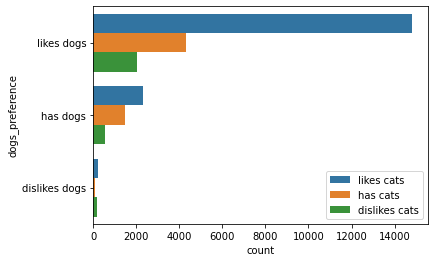

In [44]:
sns.countplot(data=profiles, y='dogs_preference', hue='cats_preference')
plt.legend(loc=4)
plt.show()

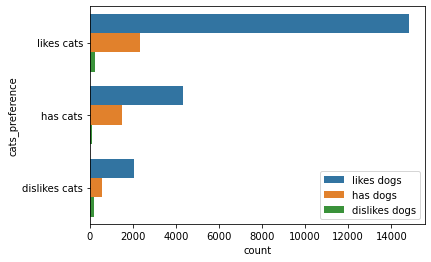

In [45]:
sns.countplot(data=profiles, y='cats_preference', hue='dogs_preference')
plt.legend(loc=4)
plt.show()

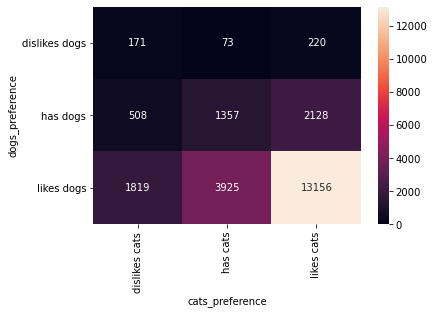

In [46]:
signs = profiles.groupby(['dogs_preference', 'cats_preference'])['sign_cleaned'].count().unstack()

ax = plt.subplot()

sns.heatmap(signs, vmin=0, annot=True, ax=ax, fmt='d');

ax.set_xlabel('cats_preference');
ax.set_ylabel('dogs_preference');

ax.xaxis.set_tick_params(rotation=90)
ax.yaxis.set_tick_params(rotation=360)

#### Religion

Most users are agnostic, atheist, or practice some other religion.  In general, folks are not very religious.

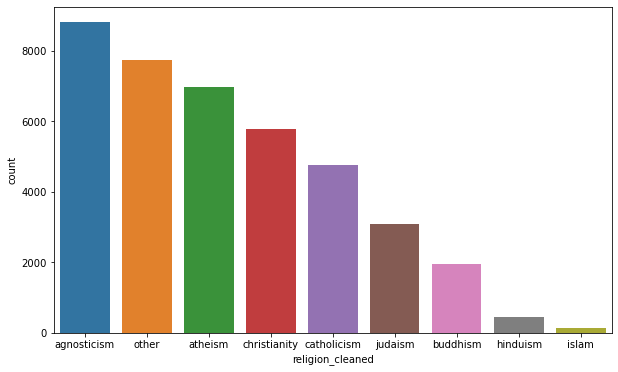

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(data=profiles, x='religion_cleaned', order=profiles.religion_cleaned.value_counts().index)
plt.show()

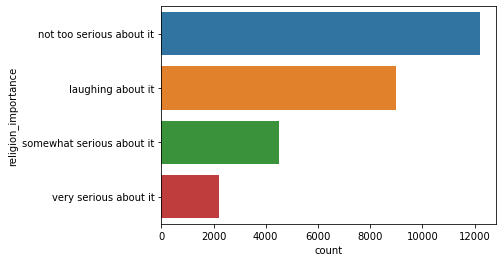

In [48]:
sns.countplot(data=profiles, y='religion_importance', order=profiles.religion_importance.value_counts().index)
plt.show()

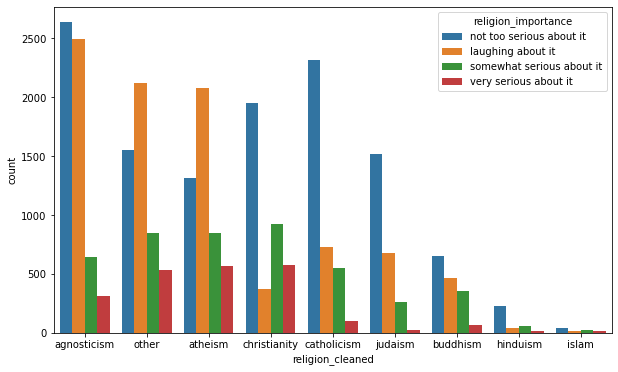

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(data=profiles, x='religion_cleaned', hue='religion_importance',\
              order=profiles.religion_cleaned.value_counts().index,\
              hue_order=profiles.religion_importance.value_counts().index)
plt.show()

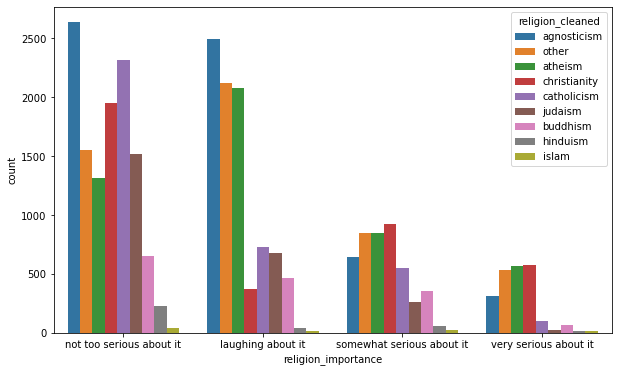

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(data=profiles, x='religion_importance', hue='religion_cleaned',\
              order=profiles.religion_importance.value_counts().index,\
              hue_order=profiles.religion_cleaned.value_counts().index)
plt.show()

#### Sign

The signs of users are roughly uniformly distributed, though Leo is most common and Capricorn is least common.  Very few users think their astrological sign "matters a lot".  The rest of users either don't care or find astrology entertaining.

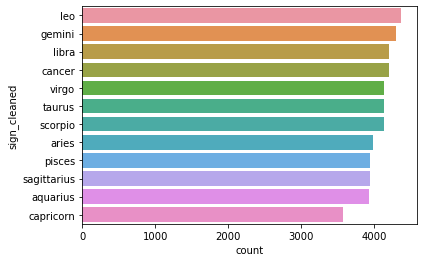

In [51]:
sns.countplot(data=profiles, y='sign_cleaned', order=profiles.sign_cleaned.value_counts().index)
plt.show()

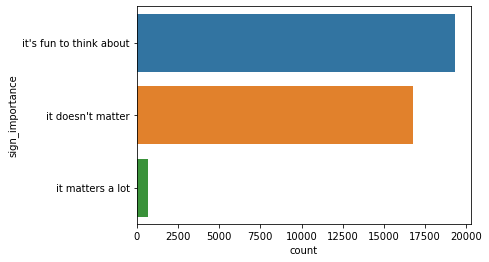

In [52]:
sns.countplot(data=profiles, y='sign_importance', order=profiles.sign_importance.value_counts().index)
plt.show()

#### Smoking

The vast majority of users don't smoke.

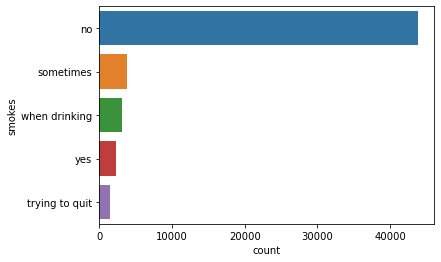

In [53]:
sns.countplot(data=profiles, y='smokes', order=profiles.smokes.value_counts().index)
plt.show()

#### Status

Obviously, the nearly all of users are single or available.

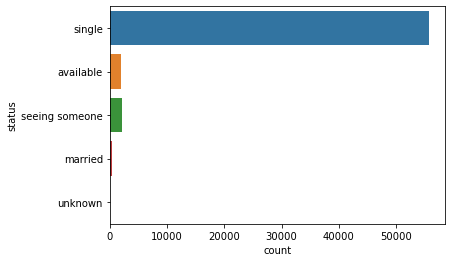

In [54]:
sns.countplot(data=profiles, y='status')
plt.show()

#### Location

The vast majority of users are located in the Bay Area.  Plotted below are the top ten cities in terms of user base.

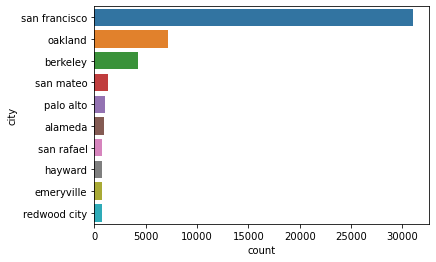

In [55]:
sns.countplot(data=profiles, y='city', order=profiles.city.value_counts().head(10).index)
plt.show()

## Data Preparation

#### Missing Data

Machine learning algorithms often do not handle missing data well, so it is critical to check whether the dataset has any missing data.  If the dataset has any null values, these values will need to be replaced or removed.

In [56]:
profiles.isnull().sum()

age                        0
body_type               5296
drinks                  2985
drugs                  14080
essay0                  5488
essay1                  7572
essay2                  9638
essay3                 11476
essay4                 10537
essay5                 10850
essay6                 13771
essay7                 12451
essay8                 19225
essay9                 12603
height                     3
income                     0
job                     8198
last_online                0
orientation                0
sex                        0
smokes                  5512
status                     0
diet_cleaned           24395
diet_importance        31734
education_cleaned       6628
education_progress      7997
ethnicity0              5680
ethnicity1             53087
ethnicity2             58499
ethnicity3             59549
ethnicity4             59783
ethnicity5             59838
ethnicity6             59856
ethnicity7             59866
ethnicity8    

Many of the columns in this dataset have missing data, so the missing data must be removed before model building.  Additionally, columns with most of its data as null values should not be used.

#### Preprocessing

Preparing data for modelling decreases run time and produces better models.  Therefore, it is important to ensure that the inputted data is of good enough quality to share with others.

The data used for the model is a subset of the variables.  These variables should be selected if they might be a good predictor of astrological signs.  Variables such as `age` should not be selected since a person's birthday, and therefore their astrological sign, roughly follows a uniform distribution each year, making `age` independent of `sign_cleaned`.

Any `NaN` values are also dropped to form a complete dataset.

In [57]:
cols = ['body_type', 'diet_cleaned', 'orientation', 'dogs_preference', 'cats_preference', 'religion_cleaned', 'job', 'sign_cleaned']
df = profiles[cols].replace('', np.nan).dropna()
df.shape

(11618, 8)

#### Dummy Variables

This dataset is composed of many categorical variables that have no quantifiable relationship with one another.  Dummy variables allow one to form relationships between these variables by turning each category per variable into its own binary identifier.  These identifiers are used to sort data into mutually exclusive categories.

Now, the dataset can use 58 columns to predict signs.

In [58]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [59]:
df.head()

,sign_cleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14,taurus,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### Label Imbalance

Since this is a multi-class problem where at least two outcomes can occur, the prediction labels must be checked for imbalances.  A label imbalance means that some of these labels only occur a few times, resulting in the model not having enough data to train.  Thus, correcting a label imbalance will help prevent the model from making bad predictions.

In [60]:
label_counts = df.sign_cleaned.value_counts()

label_counts

leo            1068
gemini         1051
cancer         1034
virgo          1018
taurus          971
libra           966
aries           950
scorpio         943
sagittarius     934
pisces          930
aquarius        892
capricorn       861
Name: sign_cleaned, dtype: int64

The coefficient of variation (CV) can help determine whether the label counts are imbalanced.  This is calculated by dividing the standard deviation by the mean.

In [61]:
mean = np.mean(label_counts.tolist())
stdev = np.std(label_counts.tolist())
cv = stdev / mean

print(mean)
print(stdev)
print(cv)

968.1666666666666
60.917749648376066
0.06292072609575769


For these label counts, there is a CV of about 6.29%.  This is very small, so one can conclude that there is not a label imbalance.

#### Splitting Data

By the Pareto principle, it is heuristically advisable to split the data such that 80% is used for model training and 20% is used for testing.

In [62]:
col_length = len(df.columns)

# Y is the target column, X has the rest
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]

# Set the proportion of data to be used for validation
val_size = 0.2

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state=0)

# Convert to 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

## Prediction

#### Model Building

Scikit-Learn has a multitude of models to choose from.  A list of these multi-class models can be found [here](https://scikit-learn.org/stable/modules/multiclass.html).  This project uses seven common algorithms to make predictions.

The respective modules for Logistic Regression, Decision Trees, Random Forests, K-Nearest Neighbors, Naive Bayes, Support Vector Machines, and Neural Networks are imported below.

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

#### Evaluation Metrics

Each model will have several values evaluated in a classification report.

- **Accuracy** - the number of correct values divided by total values
- **Precision** - the number of true positives divided by the sum of true positives and false positives, i.e., true positives divided by positive guesses
- **Recall** - the number of true positives divided by the sum of true positives and false negatives, i.e., true positives divided by actual positives
- **F1 Score** - the number of true positives divided by the sum of true positives and the average of false positives and false negatives, i.e., it blends the precision and recall scores
- **Macro Avg** - the unweighted mean of precision and recall
- **Weighted Avg** - the mean of precision and recall weighted by the support values of each class
- **Support** - the number of true observations in each class

### $Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$
### $Precision = \frac{TP}{TP + FP}$
### $Recall = \frac{TP}{TP + FN}$
### $F_{1} = \frac{2}{\frac{1}{Recall} + \frac{1}{Precision}} = \frac{2}{\frac{TP + FN}{TP} + \frac{TP + FP}{TP}} = \frac{2}{\frac{2 \cdot TP + FN + FP}{TP}} = \frac{2 \cdot TP}{2 \cdot TP + FN + FP} = \frac{TP}{TP + \frac{1}{2}(FP + FN)}$

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

Additionally, each model will be undergo cross-validation using the k-fold method.  Cross-validation is a technique for assessing how the results of a statistical analysis will generalize to an independent dataset.  The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias.  One round of cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (the training set), and validating the analysis on the other subset (the validation set).  To reduce variability, most methods perform multiple rounds of cross-validation using different partitions, and the validation results are combined (e.g., averaged) over the rounds to give an estimate of the model's predictive performance.

K-fold is a non-exhaustive method – it does not compute all ways of splitting the original sample – where the original sample is randomly partitioned into _k_ equal-sized subsamples.  One subsample is retained for validation, while the remaining _k-1_ subsamples are used as training data.

In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#### Logistic Regression

The first model uses the logistic regression technique to make predictions.  Scikit-Learn uses the module `LogisticRegression()` for this purpose.  Predictions are made from the training data using `lr_model`.  These predictions are used for the classification report.

In [66]:
lr_model = LogisticRegression(multi_class='multinomial').fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

The final accuracy of the model is 12%.  This result is quite poor since a random guess would produce an accuracy of 1/12 (8.33%).

In [67]:
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.11      0.07      0.08       729
       aries       0.11      0.07      0.08       770
      cancer       0.14      0.26      0.18       819
   capricorn       0.13      0.03      0.05       697
      gemini       0.12      0.20      0.15       851
         leo       0.13      0.27      0.17       854
       libra       0.12      0.08      0.10       756
      pisces       0.13      0.05      0.08       730
 sagittarius       0.12      0.05      0.07       738
     scorpio       0.13      0.09      0.10       762
      taurus       0.13      0.12      0.12       795
       virgo       0.12      0.15      0.13       793

    accuracy                           0.12      9294
   macro avg       0.12      0.12      0.11      9294
weighted avg       0.12      0.12      0.11      9294



Below is a confusion matrix of the results for the results of the logistic regression.  The true values are on the y-axis, and the predicted values are along the x-axis.  The diagonal from the upper left to the lower right are the true positives.  Ideally, these boxes will be the lightest, indicating that they have the highest counts of true positives.

In general, it seems the `lr_model` simply selected labels based on their value counts.  Recall that Capricorn had the most users while Leo had the fewest.  Likewise, Capricorn has the most predictions while Leo has the fewest.

In [68]:
lr_cm = confusion_matrix(Y_train, lr_predictions)
lr_labels = lr_model.classes_

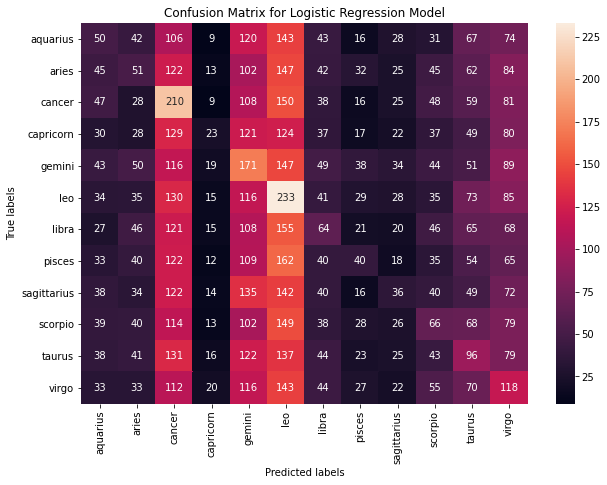

In [69]:
plt.figure(figsize=(10, 7))

ax = plt.subplot()

sns.heatmap(lr_cm, annot=True, ax=ax, fmt='d');

# title, labels, and ticks
ax.set_title('Confusion Matrix for Logistic Regression Model');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');

ax.xaxis.set_tick_params(rotation=90)
ax.yaxis.set_tick_params(rotation=360)

ax.xaxis.set_ticklabels(lr_labels);
ax.yaxis.set_ticklabels(lr_labels);

After running k-fold, it seems this model would do even worse on an independent dataset at 8.76% accuracy.  This shows this model is barely able to predict better than a random guess.  This model should not be used for prediction.

In [70]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [71]:
lr_results = cross_val_score(lr_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(lr_results)
print('Baseline: %.2f%% (%.2f%%)' % (lr_results.mean()*100, lr_results.std()*100))

[0.09198494 0.08552985 0.08929532 0.08391608 0.08719053]
Baseline: 8.76% (0.28%)


#### K-Nearest Neighbors

The next model is the `KNeighborsClassifier()`, which uses a default `n_neighbors` argument of 5.  This value was kept for the model.

The `knn_model` did much better on its own for predictions than `lr_model` with an accuracy of 30%.  This seems to be promising.

In [72]:
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

In [73]:
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.24      0.63      0.34       729
       aries       0.25      0.49      0.33       770
      cancer       0.28      0.39      0.33       819
   capricorn       0.32      0.30      0.31       697
      gemini       0.33      0.29      0.31       851
         leo       0.34      0.27      0.30       854
       libra       0.35      0.25      0.29       756
      pisces       0.33      0.20      0.25       730
 sagittarius       0.37      0.21      0.27       738
     scorpio       0.37      0.19      0.25       762
      taurus       0.37      0.17      0.23       795
       virgo       0.35      0.20      0.25       793

    accuracy                           0.30      9294
   macro avg       0.32      0.30      0.29      9294
weighted avg       0.32      0.30      0.29      9294



From the confusion matrix for k-nearest neighbors, one can conclude that this model had far more true positives than the previous model.  At the same time, it seems the model predicted with a preference for signs earlier in the alphabet.

In [74]:
knn_cm = confusion_matrix(Y_train, knn_predictions)
knn_labels = knn_model.classes_

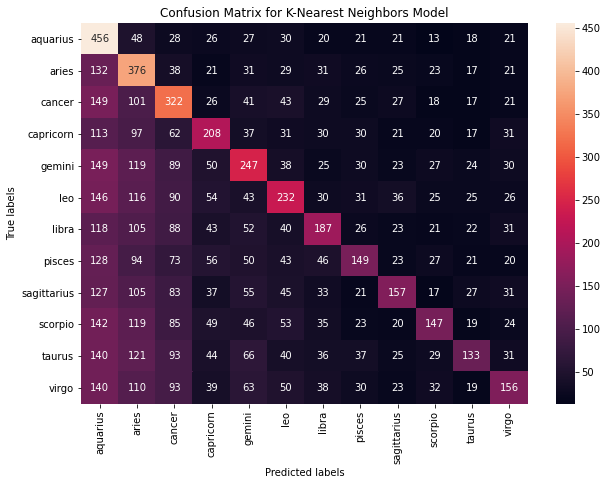

In [75]:
plt.figure(figsize=(10, 7))

ax = plt.subplot()

sns.heatmap(knn_cm, annot=True, ax=ax, fmt='d');

# title, labels, and ticks
ax.set_title('Confusion Matrix for K-Nearest Neighbors Model');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');

ax.xaxis.set_tick_params(rotation=90)
ax.yaxis.set_tick_params(rotation=360)

ax.xaxis.set_ticklabels(knn_labels);
ax.yaxis.set_ticklabels(knn_labels);

Unfortunately, on an independent dataset, this model would also do no better than a random guess.  The `knn_model` also should not be used for predicting a user's astrological sign.

In [76]:
knn_results = cross_val_score(knn_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(knn_results)
print('Baseline: %.2f%% (%.2f%%)' % (knn_results.mean()*100, knn_results.std()*100))

[0.08768155 0.09413663 0.08122647 0.07423346 0.08019376]
Baseline: 8.35% (0.68%)


#### Decision Trees

The next model is a decision tree with no limit as to the number of branches used.

The 59% accuracy result for `dt_model` is very promising.  However, as seen in previous models, higher accuracy during training does not necessarily result in higher accuracy for an independent dataset.  Such models are often overfit.

In [77]:
dt_model = DecisionTreeClassifier().fit(X_train, Y_train)
dt_predictions = dt_model.predict(X_train) 

In [78]:
print(classification_report(Y_train, dt_predictions))

              precision    recall  f1-score   support

    aquarius       0.48      0.80      0.60       729
       aries       0.47      0.74      0.58       770
      cancer       0.58      0.70      0.63       819
   capricorn       0.56      0.63      0.60       697
      gemini       0.60      0.63      0.62       851
         leo       0.60      0.62      0.61       854
       libra       0.60      0.57      0.59       756
      pisces       0.59      0.54      0.56       730
 sagittarius       0.80      0.51      0.62       738
     scorpio       0.78      0.47      0.58       762
      taurus       0.78      0.45      0.57       795
       virgo       0.68      0.46      0.55       793

    accuracy                           0.59      9294
   macro avg       0.63      0.59      0.59      9294
weighted avg       0.63      0.59      0.59      9294



The confusion matrix below shows `dt_model` was far more accurate on the training data than its predecessors.  Though, again, there seems to be an alphabetical bias.

In [80]:
dt_cm = confusion_matrix(Y_train, dt_predictions)
dt_labels = dt_model.classes_

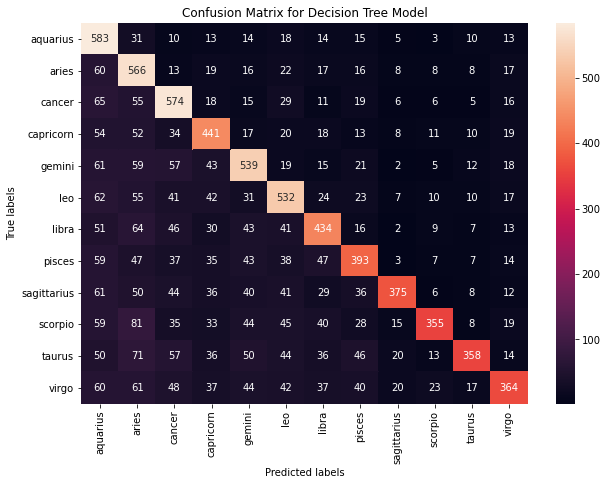

In [82]:
plt.figure(figsize=(10, 7))

ax = plt.subplot()

sns.heatmap(dt_cm, annot=True, ax=ax, fmt='d');

# title, labels, and ticks
ax.set_title('Confusion Matrix for Decision Tree Model');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');

ax.xaxis.set_tick_params(rotation=90)
ax.yaxis.set_tick_params(rotation=360)

ax.xaxis.set_ticklabels(dt_labels);
ax.yaxis.set_ticklabels(dt_labels);

With a branch depth of 47, `dt_model` is almost certainly overfit.

In [83]:
dt_model.get_depth()

47

A possible explanation for the low accuracy on an independent dataset could be due to `dt_model` being overfit.  Furthermore, the model is essentially a random guess and also should not be used in practice.

In [84]:
dt_results = cross_val_score(dt_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(dt_results)
print('Baseline: %.2f%% (%.2f%%)' % (dt_results.mean()*100, dt_results.std()*100))

[0.08068854 0.08015062 0.09306079 0.07961269 0.09149623]
Baseline: 8.50% (0.60%)


##### Depth-Limited Decision Trees

Now, the decision tree model is limited to a maximum depth of 20 branches.  The objective of depth limitation is to reduce the likelihood of overfitting.

It seems restricting the model's ability to use more branches reduced its accuracy in predicting signs from the training data.  The `dt20_model` was correct a little more than 1/3 of the time.

In [85]:
dt20_model = DecisionTreeClassifier(max_depth=20).fit(X_train, Y_train) 
dt20_predictions = dt20_model.predict(X_train) 

In [86]:
print(classification_report(Y_train, dt20_predictions))

              precision    recall  f1-score   support

    aquarius       0.49      0.37      0.42       729
       aries       0.29      0.40      0.33       770
      cancer       0.33      0.43      0.37       819
   capricorn       0.60      0.27      0.37       697
      gemini       0.37      0.37      0.37       851
         leo       0.23      0.46      0.30       854
       libra       0.63      0.24      0.34       756
      pisces       0.38      0.30      0.33       730
 sagittarius       0.45      0.27      0.34       738
     scorpio       0.53      0.26      0.35       762
      taurus       0.49      0.26      0.34       795
       virgo       0.19      0.38      0.25       793

    accuracy                           0.34      9294
   macro avg       0.41      0.33      0.34      9294
weighted avg       0.41      0.34      0.34      9294



The predictions of the `dt20_model` are similar to those of the `lr_model` in that the model seems to have bias towards signs with higher value counts.

In [87]:
dt20_cm = confusion_matrix(Y_train, dt20_predictions)
dt20_labels = dt20_model.classes_

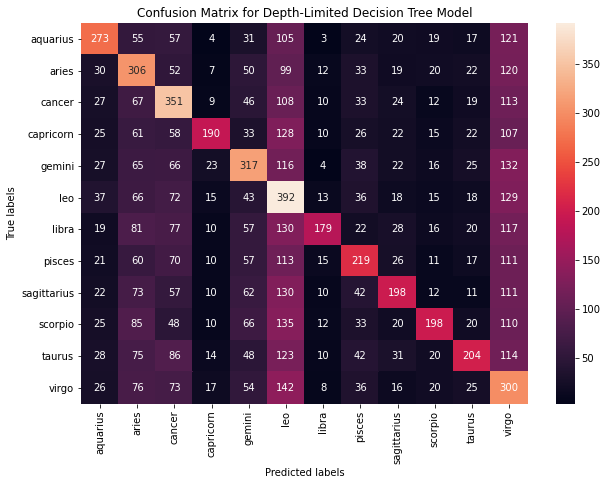

In [88]:
plt.figure(figsize=(10, 7))

ax = plt.subplot()

sns.heatmap(dt20_cm, annot=True, ax=ax, fmt='d');

# title, labels, and ticks
ax.set_title('Confusion Matrix for Depth-Limited Decision Tree Model');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');

ax.xaxis.set_tick_params(rotation=90)
ax.yaxis.set_tick_params(rotation=360)

ax.xaxis.set_ticklabels(dt20_labels);
ax.yaxis.set_ticklabels(dt20_labels);

Despite the efforts to prevent overfitting, the performance of decision tree models on an independent dataset seems to be the same, regardless of whether the tree is depth-limited.  Decision trees probably should not be used for predicting users' signs.

In [89]:
dt20_results = cross_val_score(dt20_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(dt20_results)
print("Baseline: %.2f%% (%.2f%%)" % (dt20_results.mean()*100, dt20_results.std()*100))

[0.07961269 0.08176439 0.0866057  0.08768155 0.08988159]
Baseline: 8.51% (0.38%)


#### Random Forests

The next model is a random forest.  Random forests fit several decision tree classifiers on various subsamples of the dataset and use averaging to improve the predictive accuracy and control overfitting.

The `rf_model` performs roughly the same as the `dt_model`.  If this model performs similarly without overfitting, it would certainly be an upgrade from the `dt_model`.

In [90]:
rf_model = RandomForestClassifier().fit(X_train, Y_train)
rf_predictions = rf_model.predict(X_train)

In [91]:
print(classification_report(Y_train, rf_predictions))

              precision    recall  f1-score   support

    aquarius       0.62      0.58      0.60       729
       aries       0.56      0.58      0.57       770
      cancer       0.63      0.62      0.63       819
   capricorn       0.60      0.58      0.59       697
      gemini       0.59      0.62      0.60       851
         leo       0.60      0.64      0.62       854
       libra       0.58      0.59      0.58       756
      pisces       0.55      0.58      0.56       730
 sagittarius       0.64      0.60      0.62       738
     scorpio       0.62      0.55      0.58       762
      taurus       0.61      0.57      0.59       795
       virgo       0.55      0.60      0.57       793

    accuracy                           0.59      9294
   macro avg       0.59      0.59      0.59      9294
weighted avg       0.59      0.59      0.59      9294



From the confusion matrix, `rf_model` has similar accuracy to the `dt_model`, but the prediction bias is towards value counts instead of the alphabet.

In [92]:
rf_cm = confusion_matrix(Y_train, rf_predictions)
rf_labels = rf_model.classes_

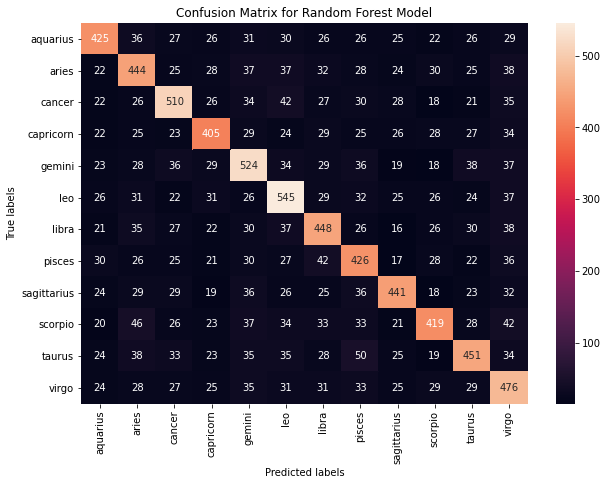

In [93]:
plt.figure(figsize=(10, 7))

ax = plt.subplot()

sns.heatmap(rf_cm, annot=True, ax=ax, fmt='d');

# title, labels, and ticks
ax.set_title('Confusion Matrix for Random Forest Model');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');

ax.xaxis.set_tick_params(rotation=90)
ax.yaxis.set_tick_params(rotation=360)

ax.xaxis.set_ticklabels(rf_labels);
ax.yaxis.set_ticklabels(rf_labels);

The average depth of the trees in `rf_model` is smaller than that of the `dt_model`.  This suggests the model has similar prediction power while reducing how overfit it is.  However, an average depth of about 43 branches is still quite overfit.

In [94]:
print('Average depth: ' + str(np.mean([estimator.get_depth() for estimator in rf_model.estimators_])))
print('Standard deviation: ' + str(np.std([estimator.get_depth() for estimator in rf_model.estimators_])))

Average depth: 43.27
Standard deviation: 2.0486825034641165


On an independent dataset, the `rf_model` had no significant change in accuracy.  This model should not be used in practice.

In [95]:
rf_results = cross_val_score(rf_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(rf_results)
print('Baseline: %.2f%% (%.2f%%)' % (rf_results.mean()*100, rf_results.std()*100))

[0.0887574  0.07853685 0.08768155 0.08122647 0.09526372]
Baseline: 8.63% (0.59%)


##### Depth-Limited Random Forests

Now, the random forest model is limited to a maximum depth of 20 branches per tree.  Again, the objective is to reduce overfitting.

Remarkably, the `rf20_model` reduced overfitting without sacrificing accuracy on the training data.

In [96]:
rf20_model = RandomForestClassifier(max_depth=20).fit(X_train, Y_train)
rf20_predictions = rf20_model.predict(X_train)

In [97]:
print(classification_report(Y_train, rf20_predictions))

              precision    recall  f1-score   support

    aquarius       0.62      0.60      0.61       729
       aries       0.56      0.58      0.57       770
      cancer       0.61      0.62      0.62       819
   capricorn       0.59      0.57      0.58       697
      gemini       0.58      0.61      0.60       851
         leo       0.56      0.65      0.61       854
       libra       0.59      0.59      0.59       756
      pisces       0.55      0.59      0.57       730
 sagittarius       0.72      0.56      0.63       738
     scorpio       0.64      0.55      0.59       762
      taurus       0.57      0.59      0.58       795
       virgo       0.57      0.58      0.57       793

    accuracy                           0.59      9294
   macro avg       0.60      0.59      0.59      9294
weighted avg       0.60      0.59      0.59      9294



From the confusion matrix, one notices the `rf20_model` and the `rf_model` are strikingly similar.  This, again, suggests the depth-limited model reduces overfitting without sacrificing accuracy.

In [98]:
rf20_cm = confusion_matrix(Y_train, rf20_predictions)
rf20_labels = rf20_model.classes_

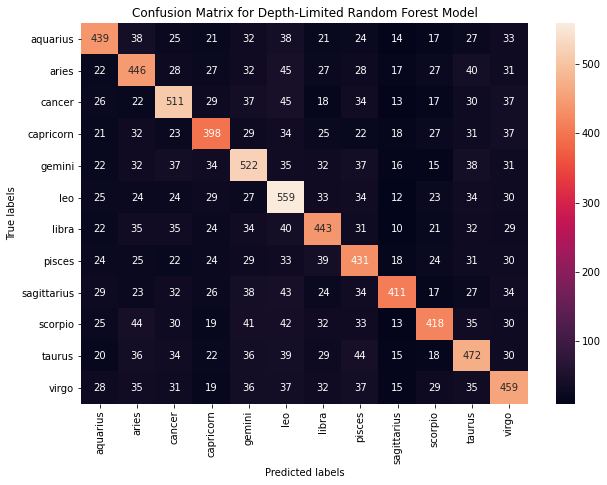

In [99]:
plt.figure(figsize=(10, 7))

ax = plt.subplot()

sns.heatmap(rf20_cm, annot=True, ax=ax, fmt='d');

# title, labels, and ticks
ax.set_title('Confusion Matrix for Depth-Limited Random Forest Model');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');

ax.xaxis.set_tick_params(rotation=90)
ax.yaxis.set_tick_params(rotation=360)

ax.xaxis.set_ticklabels(rf20_labels);
ax.yaxis.set_ticklabels(rf20_labels);

Unfortunately, the `rf20_model` performed about the same as the previous decision tree and random forest models.  As was to be expected, decision tree-based models should not be used for prediction of users' astrological signs.

In [100]:
rf20_results = cross_val_score(rf20_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(rf20_results)
print('Baseline: %.2f%% (%.2f%%)' % (rf20_results.mean()*100, rf20_results.std()*100))

[0.08821947 0.07799892 0.08929532 0.08230231 0.08880517]
Baseline: 8.53% (0.45%)


#### Naive Bayes

The below model uses a naive Bayes classifier.  Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features.  They are among the simplest Bayesian network models.

The `nb_model` uses Scikit-Learn's `BernoulliNB()` module.  This classifier is suitable for discrete data and is designed for binary/boolean features.

Unfortunately, the `nb_model` performs quite poorly on the training data – just above a random guess.  This does not bode well for the model on an independent dataset.

In [101]:
nb_model = BernoulliNB().fit(X_train, Y_train)
nb_predictions = nb_model.predict(X_train) 

In [102]:
print(classification_report(Y_train, nb_predictions))

              precision    recall  f1-score   support

    aquarius       0.10      0.05      0.07       729
       aries       0.11      0.08      0.09       770
      cancer       0.15      0.23      0.18       819
   capricorn       0.09      0.04      0.05       697
      gemini       0.12      0.17      0.14       851
         leo       0.13      0.26      0.17       854
       libra       0.11      0.08      0.09       756
      pisces       0.11      0.08      0.09       730
 sagittarius       0.10      0.06      0.07       738
     scorpio       0.12      0.09      0.11       762
      taurus       0.12      0.14      0.13       795
       virgo       0.13      0.14      0.14       793

    accuracy                           0.12      9294
   macro avg       0.12      0.12      0.11      9294
weighted avg       0.12      0.12      0.11      9294



The confusion matrix does seem to demonstrate a simple prediction of signs based on value counts.

In [103]:
nb_cm = confusion_matrix(Y_train, nb_predictions)
nb_labels = nb_model.classes_

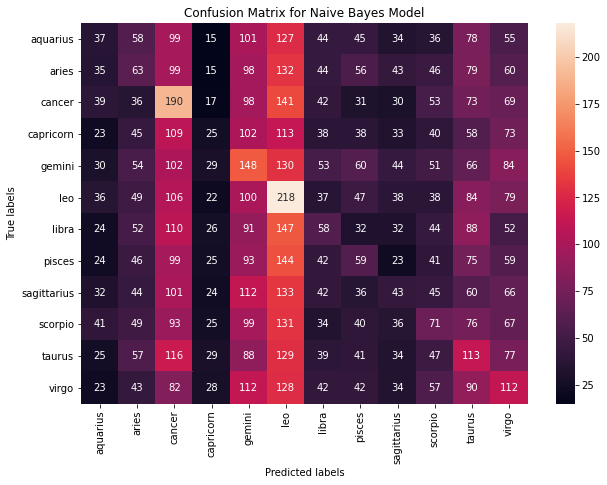

In [104]:
plt.figure(figsize=(10, 7))

ax = plt.subplot()

sns.heatmap(nb_cm, annot=True, ax=ax, fmt='d');

# title, labels, and ticks
ax.set_title('Confusion Matrix for Naive Bayes Model');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');

ax.xaxis.set_tick_params(rotation=90)
ax.yaxis.set_tick_params(rotation=360)

ax.xaxis.set_ticklabels(nb_labels);
ax.yaxis.set_ticklabels(nb_labels);

As expected, the model performs poorly on independent datasets.  Notably, the accuracy level of this model on independent data is roughly equal to that of the previous models.  Naive Bayes classifiers also should not be used to predict users' sings.

In [105]:
nb_results = cross_val_score(nb_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(nb_results)
print('Baseline: %.2f%% (%.2f%%)' % (nb_results.mean()*100, nb_results.std()*100))

[0.08499193 0.08068854 0.09198494 0.08068854 0.09149623]
Baseline: 8.60% (0.50%)


#### Support Vector Machines

The next model is a Support Vector Machine classifier.

The `svm_model` performs undoubtedly the worst of the models so far with an accuracy of about 8%.  Despite a lack of numerical precision with this accuracy, one can assume the model essentially predicts randomly.

In [106]:
svm_model = LinearSVC(multi_class='crammer_singer').fit(X_train, Y_train)
svm_predictions = svm_model.predict(X_train) 

In [107]:
print(classification_report(Y_train, svm_predictions))

              precision    recall  f1-score   support

    aquarius       0.00      0.00      0.00       729
       aries       0.00      0.00      0.00       770
      cancer       0.00      0.00      0.00       819
   capricorn       0.00      0.00      0.00       697
      gemini       0.09      0.50      0.16       851
         leo       0.00      0.00      0.00       854
       libra       0.08      0.28      0.13       756
      pisces       0.00      0.00      0.00       730
 sagittarius       0.17      0.00      0.00       738
     scorpio       0.00      0.00      0.00       762
      taurus       0.09      0.21      0.13       795
       virgo       0.06      0.02      0.03       793

    accuracy                           0.09      9294
   macro avg       0.04      0.08      0.04      9294
weighted avg       0.04      0.09      0.04      9294



From the confusion matrix, it seems the `svm_model` basically only predicts Aries and Aquarius.

In [108]:
svm_cm = confusion_matrix(Y_train, svm_predictions)
svm_labels = svm_model.classes_

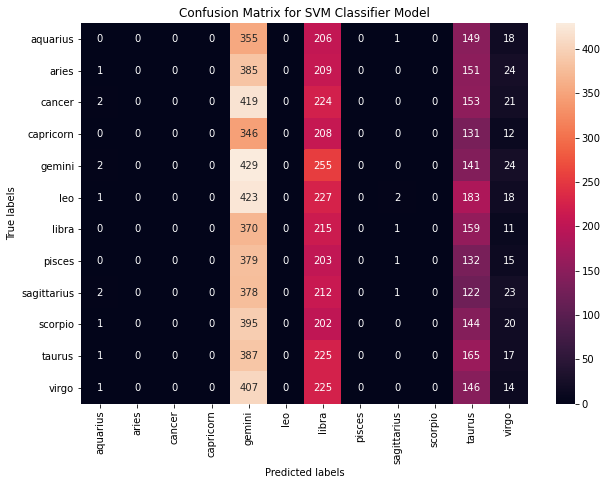

In [109]:
plt.figure(figsize=(10, 7))

ax = plt.subplot()

sns.heatmap(svm_cm, annot=True, ax=ax, fmt='d');

# title, labels, and ticks
ax.set_title('Confusion Matrix for SVM Classifier Model');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');

ax.xaxis.set_tick_params(rotation=90)
ax.yaxis.set_tick_params(rotation=360)

ax.xaxis.set_ticklabels(svm_labels);
ax.yaxis.set_ticklabels(svm_labels);

As was suggested by the training accuracy, the `svm_model` essentially predicts by random guessing.  Support Vector Machine classifiers should also not be used for predicting signs.

In [110]:
svm_results = cross_val_score(svm_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(svm_results)
print('Baseline: %.2f%% (%.2f%%)' % (svm_results.mean()*100, svm_results.std()*100))

[0.07584723 0.07530931 0.07638515 0.08606778 0.08557589]
Baseline: 7.98% (0.49%)


#### Neural Networks

The final preliminary model is a neural network.  Scikit-Learn's `MLPClassifier()` module is a multi-layer perceptron neural network.  The model optimizes the log-loss function using LBFGS or stochastic gradient descent.

The neural network's prediction accuracy on the training data is still not very good at 28%.

In [111]:
neural_model = MLPClassifier().fit(X_train, Y_train)
neural_predictions = neural_model.predict(X_train) 

In [112]:
print(classification_report(Y_train, neural_predictions))

              precision    recall  f1-score   support

    aquarius       0.28      0.26      0.27       729
       aries       0.30      0.26      0.28       770
      cancer       0.32      0.32      0.32       819
   capricorn       0.24      0.32      0.28       697
      gemini       0.35      0.28      0.31       851
         leo       0.30      0.31      0.31       854
       libra       0.26      0.33      0.29       756
      pisces       0.28      0.25      0.27       730
 sagittarius       0.30      0.22      0.25       738
     scorpio       0.25      0.26      0.26       762
      taurus       0.27      0.32      0.30       795
       virgo       0.26      0.25      0.26       793

    accuracy                           0.28      9294
   macro avg       0.29      0.28      0.28      9294
weighted avg       0.29      0.28      0.28      9294



From the confusion matrix, the `neural_model` predicts roughly evenly across signs, with similar accuracy for each sign.

In [113]:
neural_cm = confusion_matrix(Y_train, neural_predictions)
neural_labels = neural_model.classes_

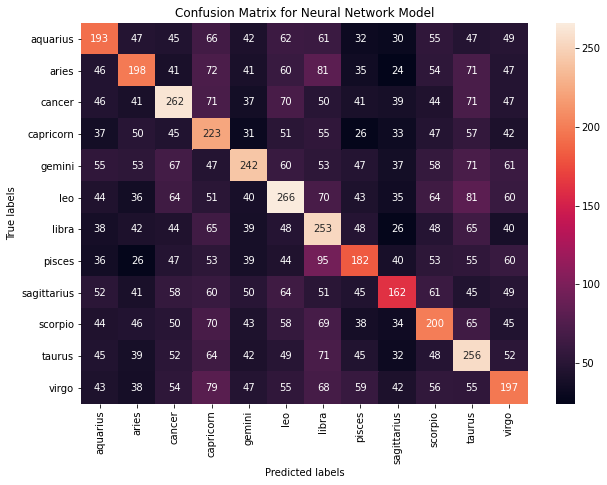

In [114]:
plt.figure(figsize=(10, 7))

ax = plt.subplot()

sns.heatmap(neural_cm, annot=True, ax=ax, fmt='d');

# title, labels, and ticks
ax.set_title('Confusion Matrix for Neural Network Model');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');

ax.xaxis.set_tick_params(rotation=90)
ax.yaxis.set_tick_params(rotation=360)

ax.xaxis.set_ticklabels(neural_labels);
ax.yaxis.set_ticklabels(neural_labels);

Unfortunately, the `neural_model` also fails to provide significantly higher accuracy for an independent dataset than the other models.

Based on the fact that no model predicted signs better than a random guess, one concludes that astrological signs are an immutable characteristic that cannot accurately be predicted from an individual's personality data.

In [115]:
neural_results = cross_val_score(neural_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(neural_results)
print("Baseline: %.2f%% (%.2f%%)" % (neural_results.mean()*100, neural_results.std()*100))

[0.08552985 0.08068854 0.07799892 0.08606778 0.07965554]
Baseline: 8.20% (0.32%)


### Final Model

Despite the conclusion from the preliminary models, for the sake of using the validation set, a final model will be selected based on preliminary results.

#### Depth-Limited Random Forest Model

The depth-limited random forest model was selected due to its high preliminary accuracy on training data, its reduction in overfitting, and its relatively uniform selection bias.  Since each model had roughly equal accuracy on independent data, that factor was irrelevant for model selection.

The final model produced an accuracy of about 9%.  Due to the classification report's rounding of this metric, one can assume that this validation accuracy is roughly the same as the k-fold accuracy from the preliminary testing.  This result was expected due to fact that k-fold is designed to produce a similar result to validation.

Again, based on this result, one concludes that astrological signs are an immutable characteristic that cannot accurately be predicted from an individual's personality data.

In [116]:
rf20_predictions_val = rf20_model.predict(X_val) 
print(classification_report(Y_val, rf20_predictions_val))

              precision    recall  f1-score   support

    aquarius       0.05      0.05      0.05       163
       aries       0.08      0.09      0.09       180
      cancer       0.09      0.09      0.09       215
   capricorn       0.11      0.11      0.11       164
      gemini       0.09      0.10      0.09       200
         leo       0.08      0.10      0.09       214
       libra       0.09      0.08      0.08       210
      pisces       0.06      0.05      0.05       200
 sagittarius       0.08      0.05      0.06       196
     scorpio       0.08      0.07      0.08       181
      taurus       0.11      0.13      0.12       176
       virgo       0.14      0.12      0.13       225

    accuracy                           0.09      2324
   macro avg       0.09      0.09      0.09      2324
weighted avg       0.09      0.09      0.09      2324



Based on the confusion matrix, it is apparent that the final model almost uniformly predicts the astrological sign for a user.

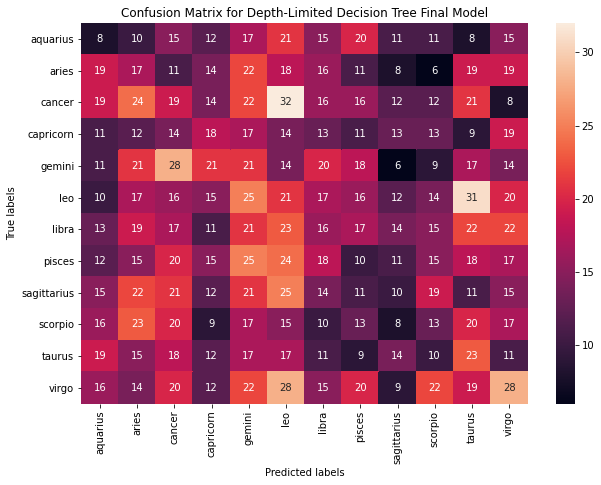

In [117]:
rf20_final_cm = confusion_matrix(Y_val, rf20_predictions_val)
rf20_labels = rf20_model.classes_

plt.figure(figsize=(10, 7))

ax = plt.subplot()

sns.heatmap(rf20_final_cm, annot=True, ax=ax, fmt='d');

# title, labels, and ticks
ax.set_title('Confusion Matrix for Depth-Limited Decision Tree Final Model');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');

ax.xaxis.set_tick_params(rotation=90)
ax.yaxis.set_tick_params(rotation=360)

ax.xaxis.set_ticklabels(rf20_labels);
ax.yaxis.set_ticklabels(rf20_labels);

## Conclusion

### Reflection

This project used machine learning techniques to predict the astrological signs of OkCupid users.  This is an important feature since many people believe in astrology as a means of romantic compatability.  Thus, if a user does not self-report a sign, an accurate prediction of their sign could help create matches between compatible users.

Unfortunately, the final model did no better than a random guess.  The most likely reason for this result is that the immutable characteristic of date of birth – and, by extension, astrological sign – is independent of an individual's personality characteristics.  These develop quite fluidly and are influenced by environment and upbringing.  As a result, it is impossible to predict someone's sign based on personality, even for machine learning models.

### Next Steps

Since it has been concluded that predicting astrological signs is virtually impossible, continuing to pursue that goal would fall under the definition of insanity.

An alternative to predicting astrological signs could be grouping users based on their responses.  This would require the use of clustering methods used in unsupervised machine learning.  One way to do this is to use natural language processing on the essay responses.  For each question, a user could be given a sentiment score based on their response.  These scores, then, could be used in clustering methods, and users could be grouped together.

Clustering would not be limited to sentiment scores from NLP, however.  One could also perform clustering on the responses used for prediction or a combination of both.  Some examples of clustering methods include KMeans, DBSCAN, EM-GMM, Mean-Shift, and HAC.  These methods could prove useful in improving the matchmaking process.